In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import joblib

from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import *
from sklearn.metrics import *
#from pylab import rcParams
#from matplotlib import rc
import seaborn as sns
from sklearn.model_selection import train_test_split
#%matplotlib inline
#%config InlineBackend.figure_format='retina'
#register_matplotlib_converters()
from keras import regularizers
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
#rcParams['figure.figsize'] = 13, 6
from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM,Activation, Dropout, GRU, Bidirectional

# Read Csv File

In [3]:
df = pd.read_csv('Jinka 12.csv')
df.head()

,Rainfall,RHumid,DewPoint,MaxTemp,WindSpeed3pm,Temp9pm,MinTemp,WetBulbTemp,AirPres,Humid3pm,MaxWinSpeed,WinSpeed9pm,AvgTemp
0,Rain,47.25,14.12,32.66,-99.0,26.48,12.20,14.12,88.75,-99.0,-99.0,-99.0,27.91
1,No_Rain,33.72,9.06,34.21,-99.0,26.76,13.79,9.07,88.71,-99.0,-99.0,-99.0,27.50
2,No_Rain,31.13,7.88,35.13,-99.0,26.50,16.71,7.89,88.67,-99.0,-99.0,-99.0,27.59
3,No_Rain,32.71,9.11,34.27,-99.0,26.99,15.53,9.12,88.65,-99.0,-99.0,-99.0,28.27
4,Rain,41.13,12.34,31.93,-99.0,26.78,11.44,12.35,88.74,-99.0,-99.0,-99.0,27.99


In [4]:
#df['Rainfall'].replace({'No_Rain': 0,'Rain': 1},inplace = True)
#df['Rainfall'].value_counts()
le = LabelEncoder()
df['Rainfall'] = le.fit_transform(df['Rainfall'])
df['Rainfall'].value_counts()

1    12641
0     1605
Name: Rainfall, dtype: int64

In [5]:
train_size = int(len(df)*0.80)
train, test= df.iloc[:train_size], df.iloc[train_size:]

x_train = train.iloc[:,1:13] 
y_train = train.iloc[:,0] 
x_test = test.iloc[:,1:13] 
y_test = test.iloc[:,0]
x_train

#X = df.iloc[:,1:15]
#y = df.iloc[:,0]

,RHumid,DewPoint,MaxTemp,WindSpeed3pm,Temp9pm,MinTemp,WetBulbTemp,AirPres,Humid3pm,MaxWinSpeed,WinSpeed9pm,AvgTemp
0,47.25,14.12,32.66,-99.00,26.48,12.20,14.12,88.75,-99.00,-99.00,-99.00,27.91
1,33.72,9.06,34.21,-99.00,26.76,13.79,9.07,88.71,-99.00,-99.00,-99.00,27.50
2,31.13,7.88,35.13,-99.00,26.50,16.71,7.89,88.67,-99.00,-99.00,-99.00,27.59
3,32.71,9.11,34.27,-99.00,26.99,15.53,9.12,88.65,-99.00,-99.00,-99.00,28.27
4,41.13,12.34,31.93,-99.00,26.78,11.44,12.35,88.74,-99.00,-99.00,-99.00,27.99
...,...,...,...,...,...,...,...,...,...,...,...,...
11391,40.05,13.65,35.36,25.04,28.92,13.03,13.65,88.84,38.29,25.04,35.35,30.97
11392,52.55,16.52,31.74,-99.00,27.09,8.83,16.52,88.89,-99.00,-99.00,35.59,28.69
11393,57.39,17.65,33.65,19.96,26.92,11.93,17.65,88.82,37.29,19.96,36.88,28.30
11394,60.81,17.23,30.78,17.21,25.45,9.58,17.24,88.86,37.86,17.21,37.72,26.71


In [6]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train,y_train = oversample.fit_resample(x_train,y_train)
x_test,y_test = oversample.fit_resample(x_test,y_test)

x_train.shape, y_train.shape, x_test.shape,y_test.shape

#X,y = oversample.fit_resample(X,y)

#X.shape,y.shape

((20188, 12), (20188,), (5094, 12), (5094,))

In [7]:
# normalize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

#X = scaler.fit_transform(X)

In [8]:
#x_train = x_train.values
#x_test = x_test.values

x_train = x_train.reshape((x_train.shape[0],1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0],1,x_test.shape[1]))

#X = X.reshape((X.shape[0],1,X.shape[1]))

In [9]:
#num_classes = len(np.unique(y_train))
num_classes = len(np.unique(y_train))
num_classes

2

In [10]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [11]:
#y_train = pd.get_dummies(y_train)
#y_test = pd.get_dummies(y_test)

y_train = y_train.values
y_test = y_test.values
x_train.shape,y_train.shape,x_test.shape,y_test.shape
#y = pd.get_dummies(y)
#X.shape,y.shape

((20188, 1, 12), (20188,), (5094, 1, 12), (5094,))

In [53]:
#def create_dataset (X, y, time_steps = 1):
 #   Xs, ys = [], []
  #  
   # for i in range(len(X)-time_steps):
    #    v = X[i:i+time_steps, :]
     #   Xs.append(v)
      #  ys.append(y[i+time_steps])
        
    #return np.array(Xs), np.array(ys)
#
#TIME_STEPS = 1
#x_train, y_train = create_dataset(x_train, y_train, TIME_STEPS)
#x_test, y_test = create_dataset(x_test, y_test, TIME_STEPS)

#x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [12]:
class_weight = {0 : 1. , 1: 1.}
#class_weight = class_weight.compute_class_weight('balanced',
#                                                np.unique(y_train),y_train)

# Build a model

In [13]:
model = Sequential()
model.add(Bidirectional(LSTM(128,kernel_regularizer=regularizers.l2(0.01),recurrent_dropout=0.2,activation='relu',return_sequences=True),input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Bidirectional(LSTM(64,kernel_regularizer=regularizers.l2(0.01),recurrent_dropout=0.2,activation='relu',return_sequences=False)))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 1, 256)            144384    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 308,865
Trainable params: 308,865
Non-trainable params: 0
_________________________________________________________________


# Train the model

In [14]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

In [60]:
# simple early stopping
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [15]:
epochs = 100
batch_size = 32
history = model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,class_weight=class_weight,
callbacks=callbacks, validation_data=(x_test,y_test), shuffle = False, verbose=1)

Epoch 1/100
631/631 [==============================] - 43s 28ms/step - loss: 1.5338 - accuracy: 0.8478 - val_loss: 0.3226 - val_accuracy: 0.8903
Epoch 2/100
631/631 [==============================] - 12s 20ms/step - loss: 0.3595 - accuracy: 0.8687 - val_loss: 0.2982 - val_accuracy: 0.8920
Epoch 3/100
631/631 [==============================] - 12s 20ms/step - loss: 0.3435 - accuracy: 0.8694 - val_loss: 0.2874 - val_accuracy: 0.8936
Epoch 4/100
631/631 [==============================] - 12s 20ms/step - loss: 0.3355 - accuracy: 0.8701 - val_loss: 0.2810 - val_accuracy: 0.8928
Epoch 5/100
631/631 [==============================] - 12s 19ms/step - loss: 0.3305 - accuracy: 0.8703 - val_loss: 0.2771 - val_accuracy: 0.8934
Epoch 6/100
631/631 [==============================] - 12s 18ms/step - loss: 0.3271 - accuracy: 0.8698 - val_loss: 0.2744 - val_accuracy: 0.8948
Epoch 7/100
631/631 [==============================] - 12s 20ms/step - loss: 0.3246 - accuracy: 0.8694 - val_loss: 0.2723 - val_ac

631/631 [==============================] - 12s 19ms/step - loss: 0.3041 - accuracy: 0.8710 - val_loss: 0.2495 - val_accuracy: 0.8979
Epoch 58/100
631/631 [==============================] - 12s 19ms/step - loss: 0.3040 - accuracy: 0.8711 - val_loss: 0.2493 - val_accuracy: 0.8975
Epoch 59/100
631/631 [==============================] - 12s 19ms/step - loss: 0.3038 - accuracy: 0.8713 - val_loss: 0.2490 - val_accuracy: 0.8973
Epoch 60/100
631/631 [==============================] - 13s 21ms/step - loss: 0.3037 - accuracy: 0.8711 - val_loss: 0.2487 - val_accuracy: 0.8975
Epoch 61/100
631/631 [==============================] - 12s 20ms/step - loss: 0.3036 - accuracy: 0.8713 - val_loss: 0.2487 - val_accuracy: 0.8971
Epoch 62/100
631/631 [==============================] - 12s 19ms/step - loss: 0.3035 - accuracy: 0.8712 - val_loss: 0.2485 - val_accuracy: 0.8971
Epoch 63/100
631/631 [==============================] - 13s 20ms/step - loss: 0.3034 - accuracy: 0.8714 - val_loss: 0.2484 - val_accuracy

# Create Pickle file

In [16]:
model= model.save('lstm_model.h5') # save the model as .h5 file

# Evaluate model on test data

In [17]:
model.evaluate(x_test, y_test)

AttributeError: 'NoneType' object has no attribute 'evaluate'

In [18]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

160/160 [==============================] - 4s 5ms/step - loss: 0.2467 - accuracy: 0.9003
Test accuracy 0.9002748131752014
Test loss 0.24666619300842285


In [19]:
from sklearn.metrics import accuracy_score
# Creates a confusion matrix
y_pred = model.predict(x_test)
num_classes = 2
y_true = tf.argmax(y_test, axis = 1)
y_pred = tf.argmax(y_pred, axis = 1)

InvalidArgumentError: Expected dimension in the range [-1, 1), but got 1 [Op:ArgMax]

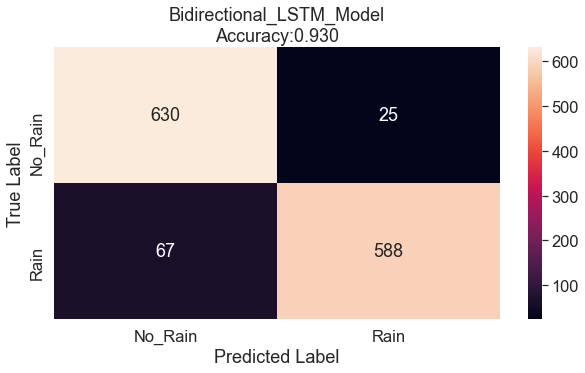

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred, labels=[0,1]) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['No_Rain','Rain'], 
                     columns = ['No_Rain','Rain'])

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, fmt="d") 
plt.title('Bidirectional_LSTM_Model\nAccuracy:{0:.3f}'.format(accuracy_score(y_true, y_pred)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [38]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
print(metrics.classification_report(y_true, y_pred, target_names=['No_Rain','Rain']))

              precision    recall  f1-score   support

     No_Rain       0.90      0.96      0.93       655
        Rain       0.96      0.90      0.93       655

    accuracy                           0.93      1310
   macro avg       0.93      0.93      0.93      1310
weighted avg       0.93      0.93      0.93      1310



# Plot the model's training and validation loss

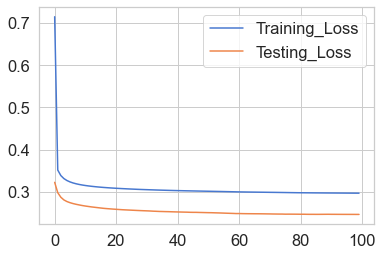

In [20]:
plt.plot(history.history['loss'], label='Training_Loss')
plt.plot(history.history['val_loss'], label='Testing_Loss')
plt.legend()

# Plot the model's training and validation Accuracy

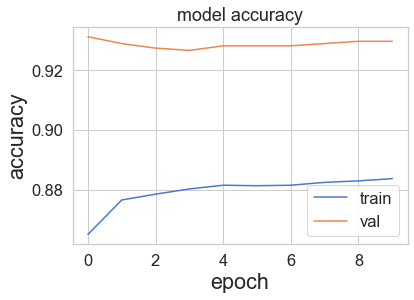

In [40]:
metric = "accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

# ROC Curve

AUC:0.9297709923664123


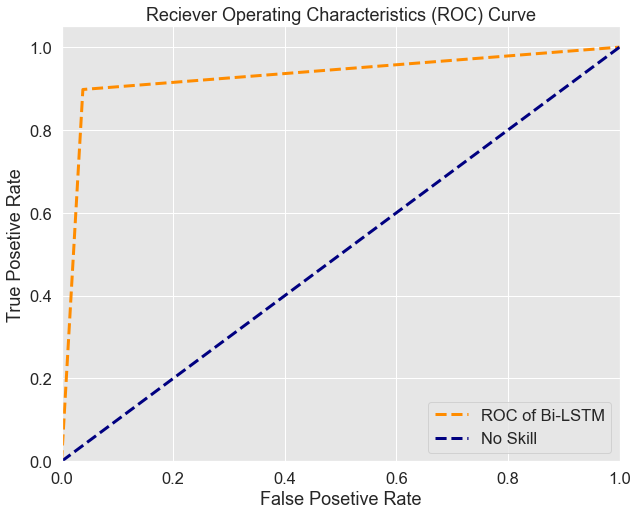

In [41]:
fpr,tpr, thresholds= roc_curve(y_true, y_pred)
#1w = 2
def ROC_curve(fpr,tpr):
    sns.set_style('darkgrid',{'axes.facecolor':'0.9'})
    print(('AUC:{}'.format(auc(fpr,tpr))))
    plt.figure(figsize=(10,8))
    plt.plot(fpr,tpr,color='darkorange', lw=3,linestyle='--', label='ROC of Bi-LSTM')
    plt.plot([0,1],[0,1],color = 'navy', lw=3, linestyle='--', label='No Skill')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
#    plt.xticks([i/20.0 for in range(21)])
    plt.xlabel('False Posetive Rate')
    plt.ylabel('True Posetive Rate')
    plt.title('Reciever Operating Characteristics (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
ROC_curve(fpr,tpr)